In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Model setup

In [3]:
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleGaussianNoisyObsDyn

target = CartPoleGaussianNoisyObsDyn(False, loc=0, scale=1)
model = NonLinearObserver(False)

In [4]:
delta_x_hat, delta_x = model.fit(target)
print(model.mse)

0.011459062610301503


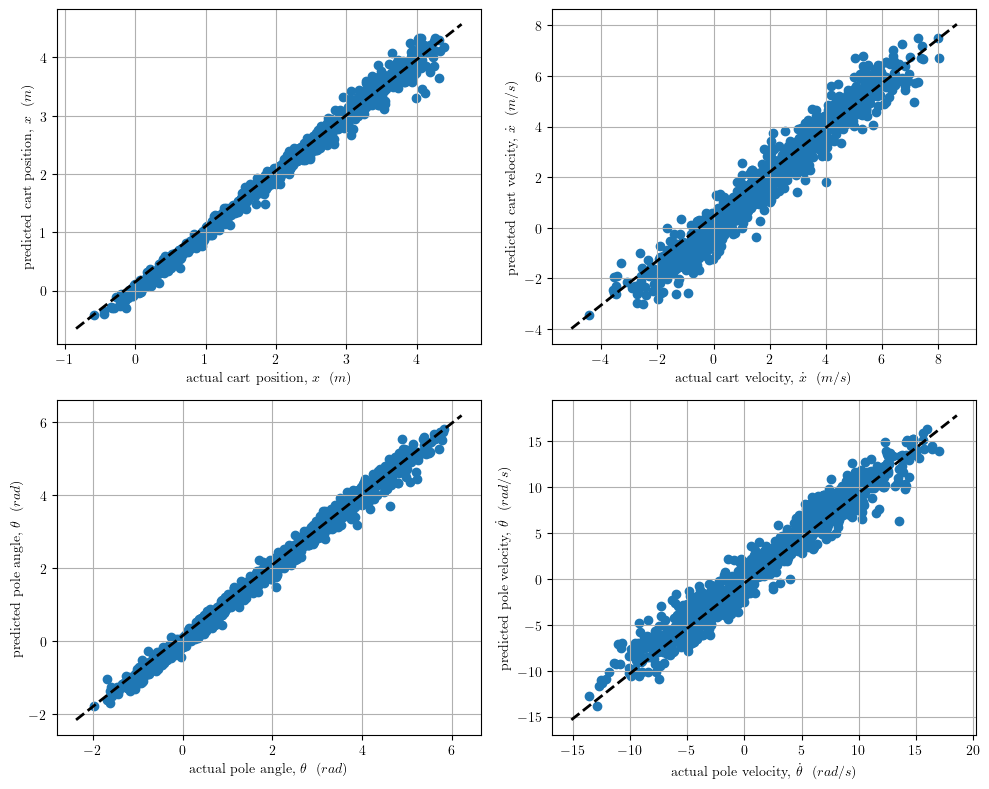

In [5]:
from task4 import t4_check_fit_plotter

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

t4_check_fit_plotter(delta_x, delta_x_hat, axs, fig)

fig.savefig("./assets4/task4__1.png", bbox_inches='tight')


# Getting optimal parameters for non-linear controller with model

In [7]:
from NonLinearController_ import NonLinearController
from task4 import STABLE_EQ, UNSTABLE_EQ

x0 = STABLE_EQ

In [8]:
# Initialize controller with prior parameters

controller = NonLinearController.get_non_linear_controller()
p0 = controller.get_params_as_np_array()

In [9]:
# Try to fit controller

p_opt = controller.fit(model, x0, p0, n_steps=10, verbose=True)
# Does not work, paramters do not update

Iter   0: [  9.74199032   6.04785066  -3.06948853  -9.72675674  -2.77179513
  -6.42368332   1.18036678   4.30898996  -7.41678316   1.0414684
  -1.15882005  -4.44469518   0.09010693  -1.40749903   2.40975771
   9.62807349   3.68760195   3.28951828   0.61116735  14.27837192
  -8.82678414  -4.16372206  -2.1106579   -1.64925291  -1.04929665
   8.29288503   1.83768189   1.78455854   6.45699304  -9.17681804
  -0.19097709 -14.1792874    5.84045067   2.19989603   2.05664531
  -2.72860751  -1.6436561   -0.27104175  -0.75662087  11.31498576
  -8.17264592   7.19411053   0.0478013  -11.44283792   4.32257146
  -5.2554531   -1.88783479   2.62209803   1.97295228   9.63686185
  -1.32869679   7.22134195  -5.51053509  -7.81575369   3.02448817
  -8.71309949  -4.6182695    4.64085396  -2.45703431   8.84158024
   7.87756765  -2.82947391   1.00663185  -7.11546295   1.
   1.           1.           1.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.       

Iter   4: [  9.74199032   6.04785066  -3.06948853  -9.72675674  -2.77179513
  -6.42368332   1.18036678   4.30898996  -7.41678316   1.0414684
  -1.15882005  -4.44469518   0.09010693  -1.40749903   2.40975771
   9.62807349   3.68760195   3.28951828   0.61116735  14.27837192
  -8.82678414  -4.16372206  -2.1106579   -1.64925291  -1.04929665
   8.29288503   1.83768189   1.78455854   6.45699304  -9.17681804
  -0.19097709 -14.1792874    5.84045067   2.19989603   2.05664531
  -2.72860751  -1.6436561   -0.27104175  -0.75662087  11.31498576
  -8.17264592   7.19411053   0.0478013  -11.44283792   4.32257146
  -5.2554531   -1.88783479   2.62209803   1.97295228   9.63686185
  -1.32869679   7.22134195  -5.51053509  -7.81575369   3.02448817
  -8.71309949  -4.6182695    4.64085396  -2.45703431   8.84158024
   7.87756765  -2.82947391   1.00663185  -7.11546295   1.
   1.           1.           1.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.       

Iter   8: [  9.74199032   6.04785066  -3.06948853  -9.72675674  -2.77179513
  -6.42368332   1.18036678   4.30898996  -7.41678316   1.0414684
  -1.15882005  -4.44469518   0.09010693  -1.40749903   2.40975771
   9.62807349   3.68760195   3.28951828   0.61116735  14.27837192
  -8.82678414  -4.16372206  -2.1106579   -1.64925291  -1.04929665
   8.29288503   1.83768189   1.78455854   6.45699304  -9.17681804
  -0.19097709 -14.1792874    5.84045067   2.19989603   2.05664531
  -2.72860751  -1.6436561   -0.27104175  -0.75662087  11.31498576
  -8.17264592   7.19411053   0.0478013  -11.44283792   4.32257146
  -5.2554531   -1.88783479   2.62209803   1.97295228   9.63686185
  -1.32869679   7.22134195  -5.51053509  -7.81575369   3.02448817
  -8.71309949  -4.6182695    4.64085396  -2.45703431   8.84158024
   7.87756765  -2.82947391   1.00663185  -7.11546295   1.
   1.           1.           1.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.       

Iter  12: [  9.74199032   6.04785066  -3.06948853  -9.72675674  -2.77179513
  -6.42368332   1.18036678   4.30898996  -7.41678316   1.0414684
  -1.15882005  -4.44469518   0.09010693  -1.40749903   2.40975771
   9.62807349   3.68760195   3.28951828   0.61116735  14.27837192
  -8.82678414  -4.16372206  -2.1106579   -1.64925291  -1.04929665
   8.29288503   1.83768189   1.78455854   6.45699304  -9.17681804
  -0.19097709 -14.1792874    5.84045067   2.19989603   2.05664531
  -2.72860751  -1.6436561   -0.27104175  -0.75662087  11.31498576
  -8.17264592   7.19411053   0.0478013  -11.44283792   4.32257146
  -5.2554531   -1.88783479   2.62209803   1.97295228   9.63686185
  -1.32869679   7.22134195  -5.51053509  -7.81575369   3.02448817
  -8.71309949  -4.6182695    4.64085396  -2.45703431   8.84158024
   7.87756765  -2.82947391   1.00663185  -7.11546295   1.
   1.           1.           1.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.       

In [ ]:
# Try getting parameters individually, starting from w

# controller = NonLinearController.get_non_linear_controller()
# xi0, w0, omega0 = controller.get_params()
# controller.xi = xi0 = np.ones((16, 4))
# controller.omega = omega0 = np.array([1] * xi0.shape[0])
# controller.w = w0 = np.array([0.01] * 4)
# p_opt = controller.fit_only_omega(model, x0, omega0, n_steps=10, verbose=False)
# NonLinearController.total_loss_only_omega(omega0, xi0, w0, model, x0, n_steps=10)

# Does not work too


In [14]:
p_opt = controller.fit_bfgs(model, x0, p0, n_steps=10, verbose=True)


Optimization terminated successfully.
         Current function value: 11.000000
         Iterations: 0
         Function evaluations: 193
         Gradient evaluations: 1


In [48]:

controller = NonLinearController.get_non_linear_controller()
xi0, w0, omega0 = controller.get_params()

# controller.xi = xi0 = np.ones((16, 4))
# controller.omega = omega0 = np.array([1] * xi0.shape[0])
w0 = np.logspace(0.5, -2, 50 + 1)
w0 = np.tile(w0, (4, 1)).T

w0 = np.reshape(([3] * 20 * 4) + ([0.5] * 31 * 4), (-1, 4))
controller.w = w0

p_opt = controller.fit_only_omega(model, x0, omega0, n_steps=50, verbose=True)
NonLinearController.total_loss_only_omega(omega0, xi0, w0, model, x0, n_steps=50)


Iter   0: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Iter   1: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Iter   2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Iter   3: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Iter   4: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Iter   5: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Iter   6: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Iter   7: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Iter   8: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Iter   9: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


50.999999997324714

# Rather than getting into unstable equilibrium in one go, try balancing pole from unstable equilibrium

In [ ]:
from NonLinearController_ import NonLinearController
from task4 import UNSTABLE_EQ

controller = NonLinearController.get_non_linear_controller()

x0 = UNSTABLE_EQ
x0[2] = 0.5 
p0 = controller.get_params_as_np_array()

sol = controller.fit(model, x0, p0, n_steps=50, verbose=False)


In [61]:
from NonLinearController_ import NonLinearController

NonLinearController.total_loss(sol.x, model, x0, n_steps=50)

50.0

In [68]:
controller = NonLinearController.get_non_linear_controller()
xi0, w0, omega0 = controller.get_params()

# controller.xi = xi0 = np.ones((16, 4))
# controller.omega = omega0 = np.array([1] * xi0.shape[0])

# w0 = np.logspace(0.5, -2, 50 + 1)
# w0 = np.tile(w0, (4, 1)).T

# w0 = np.reshape(([3] * 20 * 4) + ([0.5] * 31 * 4), (-1, 4))
w0 = np.tile(w0, (50, 1))
controller.w = w0
controller.omega = omega0 * 0.5

# print(controller.get_params())

p_opt = controller.fit_only_omega(model, x0, omega0, n_steps=50, verbose=True)
NonLinearController.total_loss_only_omega(omega0, xi0, w0, model, x0, n_steps=50)

action force: 1.5784290077782475
action force: 4.351063322083557e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.578429007779145
action force: 4.351063322324456e-1

action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5784290078573002
action force: 4.3510633458924665e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action forc

action force: 0.0
action force: 1.599000764400601
action force: 1.8063037497743202e-185
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5784290079455359
action force: 4

action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5808173762701252
action force: 5.1335976201767616e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action forc

action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5784290077782475
action force: 4.351063322083557e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force

action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5784576577114489
action force: 4.359704862065815e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force

action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5784290077782475
action force: 4.351063322083557e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force

action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5784305835864896
action force: 4.351538180422271e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force

action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5785060810035394
action force: 4.374563124273306e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force

action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.578429009374404
action force: 4.351063803017416e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force:

action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5784290077788647
action force: 4.3510633222203305e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action forc

action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5785897246268596
action force: 4.399761728947251e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force

action force: 4.352158265958326e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5784290077782475
action force: 4.351063322083557e-186
action force: 0.0
action forc

action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 1.5784290077782475
action force: 4.351063322083557e-186
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force: 0.0
action force

50.0